# 01-Gaussian 解析与检查

使用 `AutoParser` 解析真实 Gaussian 日志测试文件，检查帧状态，并输出紧凑、可核对的摘要信息。

In [1]:
import os
from pathlib import Path

os.environ.setdefault("TQDM_DISABLE", "1")

from molop.io import AutoParser


def find_repo_root(start: Path | None = None) -> Path:
    current = (start or Path.cwd()).resolve()
    for parent in [current, *current.parents]:
        if (parent / "pyproject.toml").exists():
            return parent
    raise FileNotFoundError("Could not find repository root containing pyproject.toml")


repo_root = find_repo_root()
fixture_path = repo_root / "tests/test_files/g16log/2-TS1-Opt.log"
relative_fixture_path = fixture_path.relative_to(repo_root)

batch = AutoParser(fixture_path.as_posix(), n_jobs=1)
parsed_file = batch[0]
last_frame = parsed_file[-1]

print("summary_snippet:")
parsed_file.to_summary_df()


MolOP parsing with single process:   0%|          | 0/1 [00:00<?, ?it/s]

summary_snippet:


DiskStorage            General  \
                                              FilePath FileFormat  Charge   
0    /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
1    /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
2    /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
3    /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
4    /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
..                                                 ...        ...     ...   
101  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
102  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
103  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
104  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
105  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   

                                                                              \
    Multiplicity                                    CanonicalSMILES NumAtoms   
0              1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   
1              1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   
2              1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   
3              1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   
4              1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   
..           ...                                                ...      ...   
101            1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   
102            1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   
103            1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   
104            1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   
105            1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   

            Calc Parameter                           ...                \
    FrameID       Software           Version Method  ...    Functional   
0         0       Gaussian  ES64L-G16RevC.01    DFT  ...  RB3LYP-GD3BJ   
1         1       Gaussian  ES64L-G16RevC.01    DFT  ...  RB3LYP-GD3BJ   
2         2       Gaussian  ES64L-G16RevC.01    DFT  ...  RB3LYP-GD3BJ   
3         3       Gaussian  ES64L-G16RevC.01    DFT  ...  RB3LYP-GD3BJ   
4         4       Gaussian  ES64L-G16RevC.01    DFT  ...  RB3LYP-GD3BJ   
..      ...            ...               ...    ...  ...           ...   
101     101       Gaussian  ES64L-G16RevC.01    DFT  ...  RB3LYP-GD3BJ   
102     102       Gaussian  ES64L-G16RevC.01    DFT  ...  RB3LYP-GD3BJ   
103     103       Gaussian  ES64L-G16RevC.01    DFT  ...  RB3LYP-GD3BJ   
104     104       Gaussian  ES64L-G16RevC.01    DFT  ...  RB3LYP-GD3BJ   
105     105       Gaussian  ES64L-G16RevC.01    DFT  ...        RB3LYP   

                                                        Environment          \
                                              Keywords SolventModel Solvent   
0    # opt=(calcfc,ts,noeigen,maxstep=1,notrust,gdi...         None    None   
1    # opt=(calcfc,ts,noeigen,maxstep=1,notrust,gdi...         None    None   
2    # opt=(calcfc,ts,noeigen,maxstep=1,notrust,gdi...         None    None   
3    # opt=(calcfc,ts,noeigen,maxstep=1,notrust,gdi...         None    None   
4    # opt=(calcfc,ts,noeigen,maxstep=1,notrust,gdi...         None    None   
..                                                 ...          ...     ...   
101  # opt=(calcfc,ts,noeigen,maxstep=1,notrust,gdi...         None    None   
102  # opt=(calcfc,ts,noeigen,maxstep=1,notrust,gdi...         None    None   
103  # opt=(calcfc,ts,noeigen,maxstep=1,notrust,gdi...         None    None   
104  # opt=(calcfc,ts,noeigen,maxstep=1,notrust,gdi...         None    None   
105  #N Geom=AllCheck Guess=TCheck SCRF=Check GenCh...         None    None   

         

更丰富的信息摘要可以通过设置 `brief=False` 来获取。

In [2]:
parsed_file.to_summary_df(brief=False)

DiskStorage            General  \
                                              FilePath FileFormat  Charge   
0    /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
1    /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
2    /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
3    /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
4    /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
..                                                 ...        ...     ...   
101  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
102  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
103  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
104  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
105  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   

                                                                              \
    Multiplicity                                    CanonicalSMILES NumAtoms   
0              1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   
1              1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   
2              1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   
3              1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   
4              1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   
..           ...                                                ...      ...   
101            1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   
102            1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   
103            1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   
104            1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   
105            1  CC1=C=C2[CH-]C=CC=C2C=C1.Cc1ccc(C[N+]2[C@H](C[...      101   

            Calc Parameter                           ...  \
    FrameID       Software           Version Method  ...   
0         0       Gaussian  ES64L-G16RevC.01    DFT  ...   
1         1       Gaussian  ES64L-G16RevC.01    DFT  ...   
2         2       Gaussian  ES64L-G16RevC.01    DFT  ...   
3         3       Gaussian  ES64L-G16RevC.01    DFT  ...   
4         4       Gaussian  ES64L-G16RevC.01    DFT  ...   
..      ...            ...               ...    ...  ...   
101     101       Gaussian  ES64L-G16RevC.01    DFT  ...   
102     102       Gaussian  ES64L-G16RevC.01    DFT  ...   
103     103       Gaussian  ES64L-G16RevC.01    DFT  ...   
104     104       Gaussian  ES64L-G16RevC.01    DFT  ...   
105     105       Gaussian  ES64L-G16RevC.01    DFT  ...   

                     Thermal                           \
    TCH (kilocalorie / mole) TCG (kilocalorie / mole)   
0                        NaN                      NaN   
1                        NaN                      NaN   
2                        NaN                      NaN   
3                        NaN                      NaN   
4                        NaN                      NaN   
..                       ...                      ...   
101                      NaN                      NaN   
102                      NaN                      NaN   
103                      NaN                      NaN   
104                      NaN                      NaN   
105               536.632297               444.716592   

                                                       \
    U_0 (kilocalorie / mole) U_T (kilocalorie / mole)   
0                        NaN                      NaN   
1                        NaN                      NaN   
2                        NaN                      NaN   
3                        NaN                      NaN   
4                        NaN                      NaN   
..                       ...                      ...   
101                  

## 文件信息

In [3]:
parsed_file

frames=106, G16LogFileDisk(charge=0, multiplicity=1, qm_software='Gaussian', qm_software_version='ES64L-G16RevC.01', keywords='# opt=(calcfc,ts,noeigen,maxstep=1,notrust,gdiis) freq b3lyp/genecp em=gd3bj', method='DFT', basis_set='pseudopotential', functional='RB3LYP-GD3BJ', resources_raw='', solvent=None, temperature=<Quantity(298.15, 'kelvin')>, pressure=<Quantity(1.0, 'standard_atmosphere')>, running_time=<Quantity(1065479.2, 'second')>, status=Status(scf_converged=True, normal_terminated=True), geometry_optimization_status=None, options='%nprocs=32\n%mem=80GB', title_card='Title Card Required', job_type='FTS', filename='2-TS1-Opt.log')

In [4]:
parsed_file.model_dump()

{'charge': 0,
 'multiplicity': 1,
 'qm_software': 'Gaussian',
 'qm_software_version': 'ES64L-G16RevC.01',
 'keywords': '# opt=(calcfc,ts,noeigen,maxstep=1,notrust,gdiis) freq b3lyp/genecp em=gd3bj',
 'method': 'DFT',
 'basis_set': 'pseudopotential',
 'functional': 'RB3LYP-GD3BJ',
 'resources_raw': '',
 'solvent': None,
 'temperature': <Quantity(298.15, 'kelvin')>,
 'pressure': <Quantity(1.0, 'standard_atmosphere')>,
 'running_time': <Quantity(1065479.2, 'second')>,
 'status': {'scf_converged': True, 'normal_terminated': True},
 'geometry_optimization_status': None,
 'options': '%nprocs=32\n%mem=80GB',
 'title_card': 'Title Card Required',
 'job_type': 'FTS',
 'standard_orientation_transformation_matrix': array([[ 1.00000000e+00, -7.15316281e-08,  9.67269248e-08,
          2.43332149e-07],
        [ 7.15316216e-08,  1.00000000e+00,  6.57111532e-08,
         -1.92074856e-07],
        [-9.67269293e-08, -6.57111463e-08,  1.00000000e+00,
          1.30262744e-07],
        [ 0.00000000e+00, 

具有单位的属性使用[pint](https://pint.readthedocs.io/en/stable/)进行表示，支持单位转换。

In [5]:
parsed_file.running_time

<Quantity(1065479.2, 'second')>

In [6]:
parsed_file.running_time.to("h")

<Quantity(295.966444, 'hour')>

## 帧对象信息

MolOP集成了[rdkit-dof](https://github.com/gentle1999/rdkit-dof)，默认的rdkit分子渲染支持显示分子的景深效果；如果不习惯这一风格，可以通过全局配置进行关闭。

```python
from molop.config import molopconfig
molopconfig.set_dof_effect_drawer(False)
```

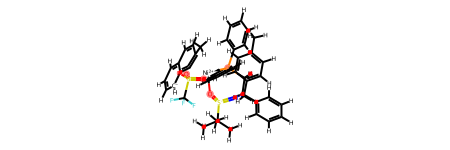

In [7]:
last_frame.rdmol

### 获取帧中的数据

In [8]:
last_frame.model_dump().keys()

dict_keys(['atoms', 'coords', 'charge', 'multiplicity', 'bonds', 'formal_charges', 'formal_num_radicals', 'frame_id', 'qm_software', 'qm_software_version', 'keywords', 'method', 'basis_set', 'functional', 'resources_raw', 'solvent', 'temperature', 'pressure', 'forces', 'hessian', 'rotation_constants', 'energies', 'thermal_informations', 'molecular_orbitals', 'vibrations', 'charge_spin_populations', 'polarizability', 'bond_orders', 'total_spin', 'single_point_properties', 'status', 'geometry_optimization_status', 'running_time', 'options', 'title_card', 'job_type', 'standard_orientation_transformation_matrix', 'standard_coords', 'file_path', 'detected_format_id', 'smiles', 'canonical_smiles', 'is_error', 'is_normal', 'is_TS', 'is_optimized', 'filename'])

如果存在多种级别的能量，`total_energy`会自动提取最高级别的能量。

In [9]:
last_frame.energies.model_dump()

{'electronic_energy': None,
 'scf_energy': <Quantity(-3667.86175, 'hartree')>,
 'mp2_energy': None,
 'mp3_energy': None,
 'mp4_energy': None,
 'ccsd_energy': None,
 'total_energy': <Quantity(-3667.86175, 'hartree')>}

热力学属性

In [10]:
last_frame.thermal_informations.model_dump()

{'ZPVE': <Quantity(502.017619, 'kilocalorie / mole')>,
 'TCE': <Quantity(536.039928, 'kilocalorie / mole')>,
 'TCH': <Quantity(536.632297, 'kilocalorie / mole')>,
 'TCG': <Quantity(444.716592, 'kilocalorie / mole')>,
 'U_0': <Quantity(-2301115.98, 'kilocalorie / mole')>,
 'U_T': <Quantity(-2301081.96, 'kilocalorie / mole')>,
 'H_T': <Quantity(-2301081.37, 'kilocalorie / mole')>,
 'G_T': <Quantity(-2301173.28, 'kilocalorie / mole')>,
 'S': <Quantity(208.673, 'calorie / mole / kelvin')>,
 'C_V': <Quantity(308.286, 'calorie / mole / kelvin')>}

优化状态

In [11]:
last_frame.geometry_optimization_status.model_dump()

{'geometry_optimized': False,
 'rms_force_threshold': 0.0003,
 'max_force_threshold': 0.00045,
 'rms_displacement_threshold': 0.0012,
 'max_displacement_threshold': 0.0018,
 'energy_change': -2.689102e-08,
 'rms_force': 4e-06,
 'max_force': 3.7e-05,
 'rms_displacement': 0.001014,
 'max_displacement': 0.004373,
 'energy_change_converged': None,
 'rms_force_converged': True,
 'max_force_converged': True,
 'rms_displacement_converged': True,
 'max_displacement_converged': False}

或者像表格一样查看

In [12]:
last_frame.geometry_optimization_status.to_df()

,value,threshold,converged
energy_change,-2.689102e-08,NaN,None
rms_force,4.000000e-06,0.00030,True
max_force,3.700000e-05,0.00045,True
rms_displacement,1.014000e-03,0.00120,True
max_displacement,4.373000e-03,0.00180,False


极化相关的信息

In [13]:
last_frame.polarizability.model_dump()

{'electronic_spatial_extent': <Quantity(32064.5204, 'bohr ** 2')>,
 'isotropic_polarizability': <Quantity(567.607, 'bohr ** 3')>,
 'anisotropic_polarizability': <Quantity(151.035, 'bohr ** 3')>,
 'polarizability_tensor': <Quantity([604.564   32.9301 583.745  -56.4015 -33.4024 514.513 ], 'bohr ** 3')>,
 'dipole': <Quantity([ 3.68616  -0.880583  2.95738 ], 'debye')>,
 'quadrupole': <Quantity([-349.5223 -319.1229 -351.3398   -7.7821  -26.9199  -17.9296], 'debye * angstrom')>,
 'traceless_quadrupole': <Quantity([ -9.5273  20.8721 -11.3448  -7.7821 -26.9199 -17.9296], 'debye * angstrom')>,
 'octapole': <Quantity([ 83.6646 -58.9773  74.3053 -25.8942 -43.5558  65.9372  30.8367  34.1059
    6.7378 -16.6707], 'debye * angstrom ** 2')>,
 'hexadecapole': <Quantity([-1.73940777e+04 -1.25671001e+04 -1.14539245e+04  4.65876000e+01
  -1.53457800e+02  2.62174600e+02 -7.24701000e+01 -1.91710500e+02
  -2.66604000e+01 -5.09340340e+03 -4.82498970e+03 -3.94426940e+03
  -1.91343500e+02  4.34870000e+00 -4.70

`molecular_orbitals`可以像列表一样进行索引，获取特定的轨道。MolOP提供了访问常用轨道的快捷方法，例如：

In [14]:
last_frame.molecular_orbitals.model_dump().keys()

dict_keys(['electronic_state', 'alpha_energies', 'beta_energies', 'alpha_occupancies', 'beta_occupancies', 'alpha_symmetries', 'beta_symmetries', 'coefficients', 'HOMO_id', 'LUMO_id', 'beta_HOMO_id', 'beta_LUMO_id', 'SOMO_ids', 'NHOMO_id', 'SLUMO_id', 'HOMO_energy', 'LUMO_energy', 'NHOMO_energy', 'SLUMO_energy', 'HOMO_LUMO_gap', 'beta_HOMO_energy', 'beta_LUMO_energy', 'beta_HOMO_LUMO_gap', 'beta_NHOMO_id', 'beta_NHOMO_energy', 'beta_SLUMO_id', 'beta_SLUMO_energy'])

In [15]:
last_frame.molecular_orbitals[0].model_dump()

{'alpha_energy': <Quantity(-89.0746, 'hartree')>,
 'beta_energy': None,
 'alpha_occupancy': True,
 'alpha_symmetry': '(A)',
 'beta_occupancy': None,
 'beta_symmetry': None,
 'coefficient': None}

In [16]:
last_frame.molecular_orbitals.HOMO.model_dump()

{'alpha_energy': <Quantity(-0.18767, 'hartree')>,
 'beta_energy': None,
 'alpha_occupancy': True,
 'alpha_symmetry': '(A)',
 'beta_occupancy': None,
 'beta_symmetry': None,
 'coefficient': None}

In [17]:
last_frame.molecular_orbitals.LUMO.model_dump()

{'alpha_energy': <Quantity(-0.06315, 'hartree')>,
 'beta_energy': None,
 'alpha_occupancy': False,
 'alpha_symmetry': '(A)',
 'beta_occupancy': None,
 'beta_symmetry': None,
 'coefficient': None}

`vibrations`也可以像列表一样进行索引，获取特定的振动模式对应的信息，例如：

In [18]:
last_frame.vibrations.model_dump().keys()

dict_keys(['frequencies', 'reduced_masses', 'force_constants', 'IR_intensities', 'vibration_modes'])

In [19]:
last_frame.vibrations[0].model_dump()


{'frequency': <Quantity(-44.2376, 'reciprocal_centimeter')>,
 'reduced_mass': <Quantity(9.5785, 'unified_atomic_mass_unit')>,
 'force_constant': <Quantity(0.011, 'millidyne / angstrom')>,
 'IR_intensity': <Quantity(19.3851, 'kilometer / mole')>,
 'vibration_mode': <Quantity([[-0.04353013 -0.0568171  -0.01688054]
  [ 0.01008565 -0.0033201   0.2121684 ]
  [-0.0093313   0.00927325  0.18452081]
  [-0.00480192 -0.0812717  -0.01543192]
  [-0.02312481 -0.05325445  0.04998448]
  [-0.01445755 -0.07534108 -0.00233244]
  [-0.00480192 -0.0812717  -0.01543192]
  [-0.0141281  -0.06995574  0.01074004]
  [-0.00531579 -0.0904913  -0.01927053]
  [-0.00428806 -0.0720521  -0.01159332]
  [-0.02458769 -0.07634687 -0.02461177]
  [-0.04488732 -0.08064165 -0.03763022]
  [-0.01445755 -0.07534108 -0.00233244]
  [-0.05505681 -0.08393063 -0.02836933]
  [-0.05538627 -0.08931597 -0.04144181]
  [-0.01445755 -0.07534108 -0.00233244]
  [ 0.00602648 -0.06721204  0.00145214]
  [-0.03475718 -0.07963586 -0.01535089]
  [-0.

其他可用属性可以参考[模型字段](reference/model_fields.md)

## TS 专属功能

对于TS，MolOP可以利用其虚频信息来进行快速查看，从而确定TS是否合理。推测发生键连变化的键会用虚线进行标注。

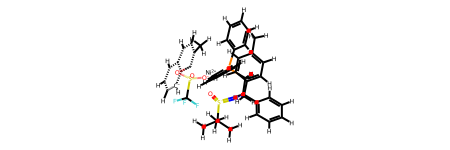

In [20]:
last_frame.to_diff_rdmol()

MolOP成功的检验了一个还原消除步骤，其中Ni的价态由+2变为+0。

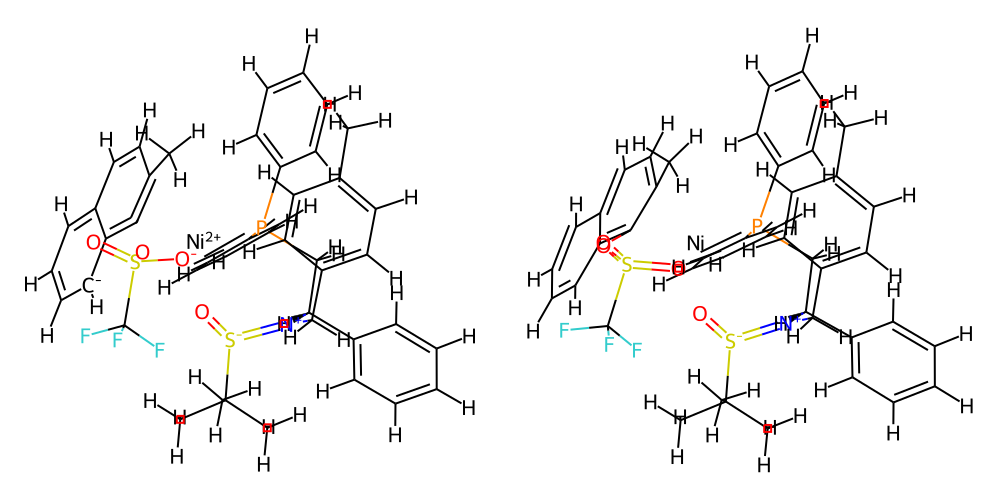

In [21]:
from rdkit.Chem import Draw

Draw.MolsToGridImage(last_frame.possible_pre_post_ts(show_3D=True), molsPerRow=2, subImgSize=(500, 500))